# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')

In [ ]:
df.loc[df['sex'] == 'female', 'sex'] = 1
df.loc[df['sex'] == 'male', 'sex'] = 0

df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0

df['region1'] = df['region']
df.loc[df['region1'] == 'southwest', 'region1'] = 1
df.loc[df['region1'] == 'southeast', 'region1'] = 0
df.loc[df['region1'] == 'northwest', 'region1'] = 0
df.loc[df['region1'] == 'northeast', 'region1'] = 0

df['region2'] = df['region']
df.loc[df['region2'] == 'southwest', 'region2'] = 0
df.loc[df['region2'] == 'southeast', 'region2'] = 1
df.loc[df['region2'] == 'northwest', 'region2'] = 0
df.loc[df['region2'] == 'northeast', 'region2'] = 0

df['region3'] = df['region']
df.loc[df['region3'] == 'southwest', 'region3'] = 0
df.loc[df['region3'] == 'southeast', 'region3'] = 0
df.loc[df['region3'] == 'northwest', 'region3'] = 1
df.loc[df['region3'] == 'northeast', 'region3'] = 0

df['region4'] = df['region']
df.loc[df['region4'] == 'southwest', 'region4'] = 0
df.loc[df['region4'] == 'southeast', 'region4'] = 0
df.loc[df['region4'] == 'northwest', 'region4'] = 0
df.loc[df['region4'] == 'northeast', 'region4'] = 1

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,southeast,1629.83350,0,1,0,0
1336,21,1,25.800,0,0,southwest,2007.94500,1,0,0,0


In [ ]:
import numpy as np
subset = df[["age", "sex", "bmi", "children", "smoker", "region1", "region2", "region3"]]
data = np.array(subset)
target = np.array(df.iloc[:,-5:-4])

In [ ]:
data

array([[19, 1, 27.9, ..., 1, 0, 0],
       [18, 0, 33.77, ..., 0, 1, 0],
       [28, 0, 33.0, ..., 0, 1, 0],
       ...,
       [18, 1, 36.85, ..., 0, 1, 0],
       [21, 1, 25.8, ..., 1, 0, 0],
       [61, 1, 29.07, ..., 0, 0, 1]], dtype=object)

In [ ]:
target

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

# 2.) Split the data into 80/20, in/out sample

In [ ]:
cut = int((len(data) * 0.8)//1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda/alpha from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_
print(a)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


115.9799859390741


# 5.) Run a Lasso regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso 
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 , -158.68185954,   -0.        ])

# 6.) Visualize the coefficients 

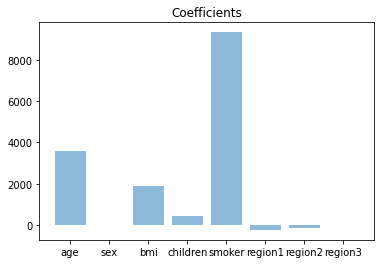

In [ ]:
objects = ('age', 'sex', 'bmi', 'children', 'smoker', 'region1', 'region2', 'region3')
y_num = range(len(objects))
plt.bar(y_num, mod1.coef_, align='center', alpha = 0.5)
plt.xticks(y_num, objects)
plt.title('Coefficients')
plt.show()

# 7.) Interpret the coefficients

From the graph above:
(1) Age has significantly influence the spending in health insurance, older people tend to spend more on it.
(2) Sex has no influence on insurance spending, as the Lasso model selects.
(3) Bmi has significantly influence the spending in health insurance, people with higher BMI indicator tend to spend more on it.
(4) Those with children are inclined to spend more on insurance.
(5) Smokers are considerably willing to spend on health insurance.
(6) For residential regions, those live in the north (northeast and northwest) has subtle or no difference in health insurance spending. Besides, residents in the south do not spend as much as those in the north.

# 8.) Compare in and out of sample MSE’s

In [ ]:
in_y_pred = mod1.predict(np.array(in_data_scale))
out_y_pred = mod1.predict(np.array(out_data_scale))

In [ ]:
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred, out_target)
in_sample_mse = mean_squared_error(in_y_pred, in_target)

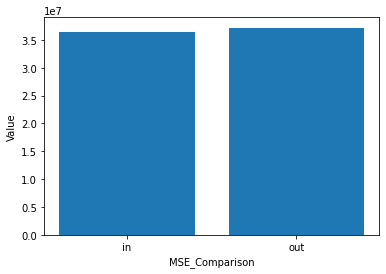

In [ ]:
plt.bar(['in', 'out'], [in_sample_mse, out_sample_mse])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()